## Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

import graphviz
import pydotplus
import io
from scipy import misc

from ipywidgets import interact
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import plotly.express as px
from plotly.subplots import make_subplots
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

%matplotlib inline

##  Spotify Song Attributes EDA

<p> <b>Download the dataset from the link:</b>      <a href="https://www.kaggle.com/geomack/spotifyclassification"> Kaggle </a> </p>

In [2]:
data = pd.read_csv('data.csv')
data2 = data.copy(deep=True)
data.head()                         # Target - 1 if they liked the song and 0 if they did not

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### <b>Number of points of each class for all Attributes </b>

In [3]:
ones = data[data['target']==1].count().reset_index()
zeros = data[data['target']==0].count().reset_index()
z = pd.merge(ones,zeros,on="index",how="inner")
z.rename(columns={'0_x':1,'0_y':0,'index':'cols'},inplace=True)
z

,cols,1,0
0,Unnamed: 0,1020,997
1,acousticness,1020,997
2,danceability,1020,997
3,duration_ms,1020,997
4,energy,1020,997
5,instrumentalness,1020,997
6,key,1020,997
7,liveness,1020,997
8,loudness,1020,997
9,mode,1020,997


### <b> Summary of the dataset </b>

In [7]:
data.describe(include='all')

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017,2017
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956,1343
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,River,Drake
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,16
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702,NaN,NaN
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091,NaN,NaN
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000,NaN,NaN
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000,NaN,NaN
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000,NaN,NaN
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000,NaN,NaN


### Check for NA's 

In [8]:
data.isna().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

### <b> Correlation of Attributes </b>

In [9]:
corr = data.corr()
corr

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
Unnamed: 0,1.000000,0.133055,-0.139615,-0.104185,-0.039880,-0.104641,-0.035611,-0.039962,0.021935,0.060639,-0.135362,-0.027890,-0.053235,-0.077812,-0.865969
acousticness,0.133055,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.139615,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,-0.104185,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.039880,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,-0.104641,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.035611,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.039962,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,0.021935,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.060639,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336


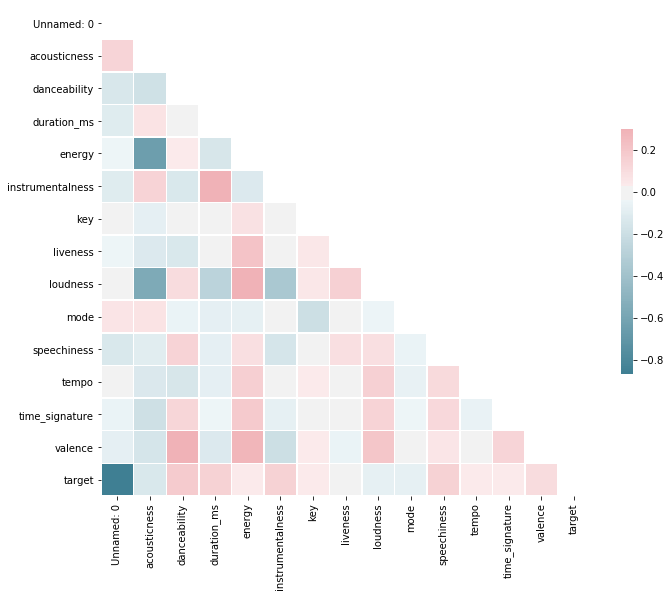

In [10]:
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=np.bool))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<b> Setting the color palette for plotting</b>

In [11]:
colors = ['skyblue','red']
palette = sns.color_palette(colors)
sns.set_palette(palette)
sns.set_style('white')

### <b> Plot of Liked and Disliked Tempo in Songs</b>

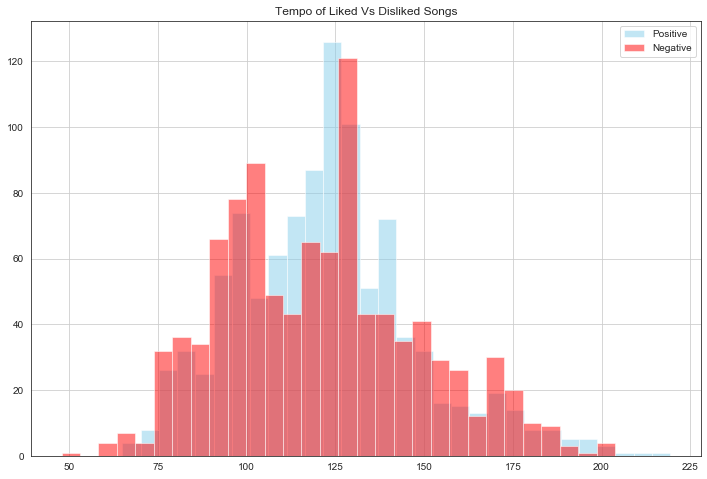

In [12]:
ptempo = data[data['target']==1]['tempo']
ntempo = data[data['target']==0]['tempo']

fig = plt.figure(figsize=(12,8))
plt.title('Tempo of Liked Vs Disliked Songs')
ptempo.hist(alpha=0.5,bins=30,label='Positive')
ntempo.hist(alpha=0.5,bins=30,label='Negative')
plt.legend(loc='upper right')
plt.show()

In [13]:
cols = data2.columns.to_list()
cols.remove('Unnamed: 0')
cols.remove('time_signature')
cols.remove('artist')
cols.remove('song_title')
cols.remove('target')

In [14]:
data2.loc[data2['target']==1,'Category']='Like'
data2.loc[data2['target']==0,'Category']='Dislike'

### <b> Interactive Plot of various Features</b>

In [15]:
def plots(Attribute):
    title = Attribute.title() + ' of Liked Vs Disliked Songs'
    fig = px.histogram(data2,x=Attribute,color='Category',title=title,opacity=0.8,nbins=30)#,histnorm='probability density')
    fig.update_layout(barmode='overlay')
    fig.show()
interact(plots,Attribute=cols)

interactive(children=(Dropdown(description='Attribute', options=('acousticness', 'danceability', 'duration_ms'…

<function __main__.plots(Attribute)>

### Most Liked Artist

In [16]:
temp1 = data[data['target']==1]
liked = temp1['artist'].value_counts().sort_values(ascending=False).reset_index()
liked[liked['artist'] == max(liked['artist'])]

,index,artist
0,Drake,13


### Most Liked Songs by Top Artist 

In [17]:
temp1[temp1['artist']=='Drake']['song_title'].reset_index(drop=True).reset_index().drop(columns=['index'])

,song_title
0,Sneakin’
1,Childs Play
2,Jumpman
3,Hotline Bling
4,Big Rings
5,Know Yourself
6,Wu-Tang Forever
7,Headlines
8,Started From the Bottom
9,"Hold On, We're Going Home"


### Most Disliked Artist

In [18]:
temp2 = data[data['target']==0]
disliked = temp2['artist'].value_counts().sort_values(ascending=False).reset_index()
disliked[disliked['artist'] == max(disliked['artist'])]

,index,artist
0,WALK THE MOON,10
1,Backstreet Boys,10


### Most Disiked Songs by Bottom Artist 

In [19]:
temp2[temp2['artist']=='WALK THE MOON']['song_title'].reset_index(drop=True).reset_index().drop(columns=['index'])

,song_title
0,Shut Up and Dance
1,Anna Sun
2,Work This Body
3,Tightrope
4,Different Colors
5,Avalanche
6,Jenny
7,Portugal
8,Quesadilla
9,Aquaman


### Top 10 Artists

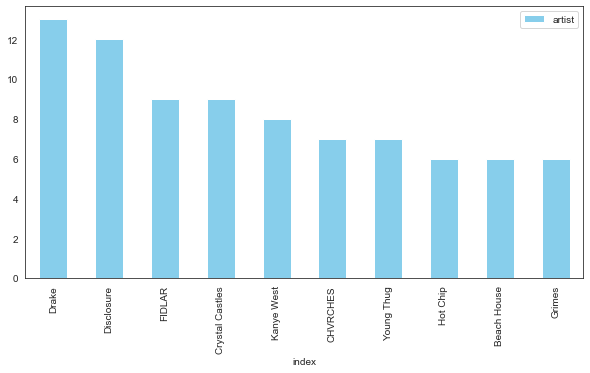

In [20]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['font.size'] = 10.0
liked.head(10).plot(x='index',y='artist',kind='bar')

### Top 10 Disliked Artists

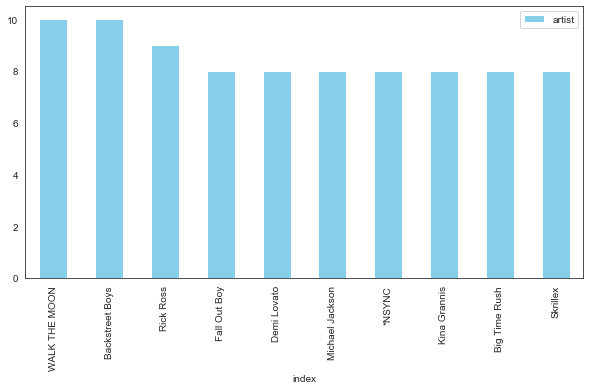

In [21]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['font.size'] = 10.0
disliked.head(10).plot(x='index',y='artist',kind='bar')

### Songs by any Artist

In [22]:
def songs(Artist):
    temp = data[data['artist'].str.contains(Artist)]['song_title'].reset_index(drop=True).reset_index().drop(columns=['index'])
    print(temp)
interact(songs,Artist=input())

Childish Gambino


interactive(children=(Text(value='Childish Gambino', description='Artist'), Output()), _dom_classes=('widget-i…

<function __main__.songs(Artist)>

### High Tempo Songs 

<b> Songs with > 75% tempo </b>

In [23]:
data[data['tempo']>138][['artist','song_title']].reset_index()

,index,artist,song_title
0,0,Future,Mask Off
1,1,Childish Gambino,Redbone
2,4,Junior Boys,Parallel Lines
3,7,Omega,Gyöngyhajú lány
4,18,Chief Keef,Bouncin
5,22,Young Thug,Imma Ride
6,23,Ty Segall,Girlfriend
7,33,Young Thug,Hercules
8,36,Three 6 Mafia,Poppin' My Collar
9,37,Drake,Jumpman


## Building a Decision Tree Model 

<b>Prepare the features to be trained on </b>

In [24]:
features = cols
features.remove('tempo')
features.remove('mode')
features.remove('liveness')

<b>Splitting Data into test and train</b>

In [25]:
train, test = train_test_split(data,test_size=0.15,random_state=2)

In [26]:
print('Train Size {} , Test Size {} '.format(train.shape[0],test.shape[0]))

Train Size 1714 , Test Size 303 


<b>Prepare the Model </b>

In [27]:
c = DecisionTreeClassifier(min_samples_split=100)

In [28]:
X_train = train[features]
y_train = train['target']

X_test = test[features]
y_test = test['target']

<b>Fit the Model </b>

In [29]:
dt = c.fit(X_train,y_train)

<b>Predict <code>target</code> and Calculate R<sup>2</sup></b>

In [30]:
from sklearn.metrics import accuracy_score
y_pred = c.predict(X_test)
score = accuracy_score(y_test,y_pred)*100
print('Accuracy of Decision Tree is {} %'.format(round(score,2)))

Accuracy of Decision Tree is 75.25 %


<b>Scaling the Train and Test Data</b>

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xx = sc.fit_transform(X_train,y_train)
xx = sc.fit_transform(X_test,y_test)
d2 = c.fit(Xx,y_train)
y_pred = c.predict(xx)
score = accuracy_score(y_test,y_pred)*100
print('Accuracy of Decision Tree is {} %'.format(round(score,2)))

Accuracy of Decision Tree is 74.92 %


<b>Performing k-fold Cross-Validation</b>

In [32]:
from sklearn.model_selection import cross_val_score
s = {}
cv = [x for x in range(2,20)]
for x in cv:
    score = cross_val_score(c,X_train,y_train,cv=x)
    s[x] = np.mean(score)*100

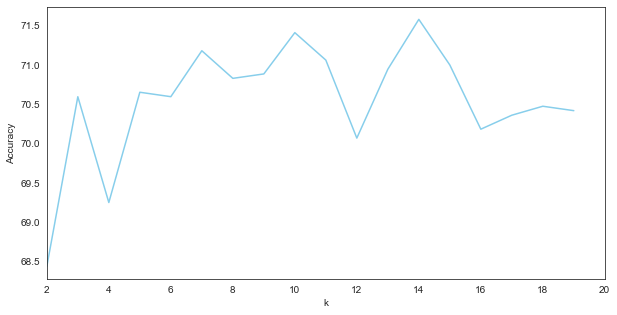

In [33]:
l = s.items()
x,y = zip(*l)
plt.figure(figsize=(10,5))
plt.xlim((2,20))
plt.plot(x,y)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

## <b>Visualize the Tree using Vizgraph</b>

In [34]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree,out_file = f,feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = (20,20)
    plt.imshow(img)

In [36]:
show_tree(dt,features,'tree_graph.png')